In [61]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
#import cf_units as cf

# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import esmlab

In [62]:
filedir_ssp = '/glade/derecho/scratch/brendanc/ARISE_GGCMI_CLM/SSP245'
filedir_sai = '/glade/derecho/scratch/brendanc/ARISE_GGCMI_CLM/SAI'

areafile = xr.open_dataset(filedir_ssp + '/240424.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.2016-2069.nc')

sspc = xr.open_dataset(filedir_ssp + '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.YIELD.2016-2069.nc')
arisec = xr.open_dataset(filedir_sai + '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.YIELD.2036-2069.nc')
sspn = xr.open_dataset(filedir_ssp + '/240424.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.NYIELD.2016-2069.nc')
arisen = xr.open_dataset(filedir_sai + '/240413.b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm_split.clm2.h2.NYIELD.2036-2069.nc')
lat = sspc['lat'].values
lon = sspc['lon'].values

In [63]:
gridarea = areafile.area
landfrac = areafile.landfrac
arwt = gridarea * landfrac
arwt_norm_sum = arwt/arwt.sum()

In [64]:
wheat_refc = sspc['yield'].sel(crops=9)
wheat_refc = wheat_refc.sel(time=slice('2016', '2035'))
wheat_refn = sspn['yield'].sel(crops=9)
wheat_refn = wheat_refn.sel(time=slice('2016', '2035'))
wheat_sspc = sspc['yield'].sel(crops=9)
wheat_sspc = wheat_sspc.sel(time=slice('2036', '2068'))
wheat_sspn = sspn['yield'].sel(crops=9)
wheat_sspn = wheat_sspn.sel(time=slice('2036', '2068'))
wheat_arisec = arisec['yield'].sel(crops=9)
wheat_arisec = wheat_arisec.sel(time=slice('2036', '2068'))
wheat_arisen = arisen['yield'].sel(crops=9)
wheat_arisen = wheat_arisen.sel(time=slice('2036', '2068'))

wheatref = np.divide(wheat_refn, wheat_refc, out=np.zeros_like(wheat_refn), where=wheat_refc!=0)
wheatssp = np.divide(wheat_sspn, wheat_sspc, out=np.zeros_like(wheat_sspn), where=wheat_sspc!=0)
wheatarise = np.divide(wheat_arisen, wheat_arisec, out=np.zeros_like(wheat_arisen), where=wheat_arisec!=0)

wheatref = wheatref.where(wheatref.values > 0.003) 
wheatref = wheatref.where(wheatref.values < 10) 
wheatssp = wheatssp.where(wheatssp.values > 0.003) 
wheatssp = wheatssp.where(wheatssp.values < 10) 
wheatarise = wheatarise.where(wheatarise.values > 0.003) 
wheatarise = wheatarise.where(wheatarise.values < 10) 

wheatref = wheatref.fillna(0)
wheatssp = wheatssp.fillna(0)
wheatarise = wheatarise.fillna(0)

#wheatref_mean_std = esmlab.statistics.weighted_mean(wheatref, dim=['lat','lon'], weights=arwt_norm_sum).load().values
#clmwheatref_std = np.std(wheatref_mean_std)
#clmwheat_std = (clmwheatref_std) / (wheatref_mean)
#clmwheat_std = clmwheat_std * 100

wheatref_mean = wheatref.mean(dim='time')
wheatref_mean = esmlab.statistics.weighted_mean(wheatref_mean, dim=['lat','lon'], weights=arwt_norm_sum).load().values
wheatssp = esmlab.statistics.weighted_mean(wheatssp, dim=['lat','lon'], weights=arwt_norm_sum).load().values
wheatsai = esmlab.statistics.weighted_mean(wheatarise, dim=['lat','lon'], weights=arwt_norm_sum).load().values

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less


In [65]:
rice_refc = sspc['yield'].sel(crops=3)
rice_refc = rice_refc.sel(time=slice('2016', '2035'))
rice_refn = sspn['yield'].sel(crops=3)
rice_refn = rice_refn.sel(time=slice('2016', '2035'))
rice_sspc = sspc['yield'].sel(crops=3)
rice_sspc = rice_sspc.sel(time=slice('2036', '2068'))
rice_sspn = sspn['yield'].sel(crops=3)
rice_sspn = rice_sspn.sel(time=slice('2036', '2068'))
rice_arisec = arisec['yield'].sel(crops=3)
rice_arisec = rice_arisec.sel(time=slice('2036', '2068'))
rice_arisen = arisen['yield'].sel(crops=3)
rice_arisen = rice_arisen.sel(time=slice('2036', '2068'))

riceref = np.divide(rice_refn, rice_refc, out=np.zeros_like(rice_refn), where=rice_refc!=0)
ricessp = np.divide(rice_sspn, rice_sspc, out=np.zeros_like(rice_sspn), where=rice_sspc!=0)
ricearise = np.divide(rice_arisen, rice_arisec, out=np.zeros_like(rice_arisen), where=rice_arisec!=0)

riceref = riceref.where(riceref.values > 0.003) 
riceref = riceref.where(riceref.values < 10) 
ricessp = ricessp.where(ricessp.values > 0.003) 
ricessp = ricessp.where(ricessp.values < 10) 
ricearise = ricearise.where(ricearise.values > 0.003) 
ricearise = ricearise.where(ricearise.values < 10) 

riceref = riceref.fillna(0)
ricessp = ricessp.fillna(0)
ricearise = ricearise.fillna(0)

#riceref_mean_std = esmlab.statistics.weighted_mean(riceref, dim=['lat','lon'], weights=arwt_norm_sum).load().values
#clmriceref_std = np.std(riceref_mean_std)
#clmrice_std = (clmriceref_std) / (riceref_mean)
#clmrice_std = clmrice_std * 100

riceref_mean = riceref.mean(dim='time')
riceref_mean = esmlab.statistics.weighted_mean(riceref_mean, dim=['lat','lon'], weights=arwt_norm_sum).load().values
ricessp = esmlab.statistics.weighted_mean(ricessp, dim=['lat','lon'], weights=arwt_norm_sum).load().values
ricesai = esmlab.statistics.weighted_mean(ricearise, dim=['lat','lon'], weights=arwt_norm_sum).load().values

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less


In [66]:
soy_refc = sspc['yield'].sel(crops=6)
soy_refc = soy_refc.sel(time=slice('2016', '2035'))
soy_refn = sspn['yield'].sel(crops=6)
soy_refn = soy_refn.sel(time=slice('2016', '2035'))
soy_sspc = sspc['yield'].sel(crops=6)
soy_sspc = soy_sspc.sel(time=slice('2036', '2068'))
soy_sspn = sspn['yield'].sel(crops=6)
soy_sspn = soy_sspn.sel(time=slice('2036', '2068'))
soy_arisec = arisec['yield'].sel(crops=6)
soy_arisec = soy_arisec.sel(time=slice('2036', '2068'))
soy_arisen = arisen['yield'].sel(crops=6)
soy_arisen = soy_arisen.sel(time=slice('2036', '2068'))

soyref = np.divide(soy_refn, soy_refc, out=np.zeros_like(soy_refn), where=soy_refc!=0)
soyssp = np.divide(soy_sspn, soy_sspc, out=np.zeros_like(soy_sspn), where=soy_sspc!=0)
soyarise = np.divide(soy_arisen, soy_arisec, out=np.zeros_like(soy_arisen), where=soy_arisec!=0)

soyref = soyref.where(soyref.values > 0.003) 
soyref = soyref.where(soyref.values < 10) 
soyssp = soyssp.where(soyssp.values > 0.003) 
soyssp = soyssp.where(soyssp.values < 10) 
soyarise = soyarise.where(soyarise.values > 0.003) 
soyarise = soyarise.where(soyarise.values < 10) 

soyref = soyref.fillna(0)
soyssp = soyssp.fillna(0)
soyarise = soyarise.fillna(0)

#soyref_mean_std = esmlab.statistics.weighted_mean(soyref, dim=['lat','lon'], weights=arwt_norm_sum).load().values
#clmsoyref_std = np.std(soyref_mean_std)
#clmsoy_std = (clmsoyref_std) / (soyref_mean)
#clmsoy_std = clmsoy_std * 100

soyref_mean = soyref.mean(dim='time')
soyref_mean = esmlab.statistics.weighted_mean(soyref_mean, dim=['lat','lon'], weights=arwt_norm_sum).load().values
soyssp = esmlab.statistics.weighted_mean(soyssp, dim=['lat','lon'], weights=arwt_norm_sum).load().values
soysai = esmlab.statistics.weighted_mean(soyarise, dim=['lat','lon'], weights=arwt_norm_sum).load().values

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less


In [67]:
maizearea = sspc['area'].sel(crops=0)
maizearea = maizearea.mean(dim='time')
arwt_maize = maizearea * landfrac
arwt_norm_sum_maize = arwt_maize/arwt_maize.sum()

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [68]:
maize_refc = sspc['yield'].sel(crops=0)
maize_refc = maize_refc.sel(time=slice('2016', '2035'))
maize_refn = sspn['yield'].sel(crops=0)
maize_refn = maize_refn.sel(time=slice('2016', '2035'))
maize_sspc = sspc['yield'].sel(crops=0)
maize_sspc = maize_sspc.sel(time=slice('2036', '2068'))
maize_sspn = sspn['yield'].sel(crops=0)
maize_sspn = maize_sspn.sel(time=slice('2036', '2068'))
maize_arisec = arisec['yield'].sel(crops=0)
maize_arisec = maize_arisec.sel(time=slice('2036', '2068'))
maize_arisen = arisen['yield'].sel(crops=0)
maize_arisen = maize_arisen.sel(time=slice('2036', '2068'))

maizeref = np.divide(maize_refn, maize_refc, out=np.zeros_like(maize_refn), where=maize_refc!=0)
maizessp = np.divide(maize_sspn, maize_sspc, out=np.zeros_like(maize_sspn), where=maize_sspc!=0)
maizearise = np.divide(maize_arisen, maize_arisec, out=np.zeros_like(maize_arisen), where=maize_arisec!=0)

maizeref = maizeref.where(maizeref.values > 0.003) 
maizeref = maizeref.where(maizeref.values < 10) 
maizessp = maizessp.where(maizessp.values > 0.003) 
maizessp = maizessp.where(maizessp.values < 10) 
maizearise = maizearise.where(maizearise.values > 0.003) 
maizearise = maizearise.where(maizearise.values < 10) 

maizeref = maizeref.fillna(0)
maizessp = maizessp.fillna(0)
maizearise = maizearise.fillna(0)

#maizeref_mean_std = esmlab.statistics.weighted_mean(maizeref, dim=['lat','lon'], weights=arwt_norm_sum).load().values
#clmmaizeref_std = np.std(maizeref_mean_std)
#clmmaize_std = (clmmaizeref_std) / (maizeref_mean)
#clmmaize_std = clmmaize_std * 100

maizeref_mean_time = maizeref.mean(dim='time')
maizeref_mean = esmlab.statistics.weighted_mean(maizeref_mean_time, dim=['lat','lon'], weights=arwt_norm_sum).load().values
maizessp = esmlab.statistics.weighted_mean(maizessp, dim=['lat','lon'], weights=arwt_norm_sum).load().values
maizesai = esmlab.statistics.weighted_mean(maizearise, dim=['lat','lon'], weights=arwt_norm_sum).load().values

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less


In [69]:
wheatssp_pchange_clm = (wheatssp - wheatref_mean) / (wheatref_mean)
wheatssp_pchange_clm = wheatssp_pchange_clm * 100
wheatsai_pchange_clm = (wheatsai - wheatref_mean) / (wheatref_mean)
wheatsai_pchange_clm = wheatsai_pchange_clm * 100

ricessp_pchange_clm = (ricessp - riceref_mean) / (riceref_mean)
ricessp_pchange_clm = ricessp_pchange_clm * 100
ricesai_pchange_clm = (ricesai - riceref_mean) / (riceref_mean)
ricesai_pchange_clm = ricesai_pchange_clm * 100

soyssp_pchange_clm = (soyssp - soyref_mean) / (soyref_mean)
soyssp_pchange_clm = soyssp_pchange_clm * 100
soysai_pchange_clm = (soysai - soyref_mean) / (soyref_mean)
soysai_pchange_clm = soysai_pchange_clm * 100

maizessp_pchange_clm = (maizessp - maizeref_mean) / (maizeref_mean)
maizessp_pchange_clm = maizessp_pchange_clm * 100
maizesai_pchange_clm = (maizesai - maizeref_mean) / (maizeref_mean)
maizesai_pchange_clm = maizesai_pchange_clm * 100

In [70]:
time = np.arange(2036, 2069)
time = list(time)
wheatsai_pchange_clm = wheatsai_pchange_clm[1:]
ricesai_pchange_clm = ricesai_pchange_clm[1:]
soysai_pchange_clm = soysai_pchange_clm[1:]
maizesai_pchange_clm = maizesai_pchange_clm[1:]
time_clm = np.arange(2037, 2069)
time_clm = list(time_clm)

In [71]:
filedir3 = '/glade/campaign/univ/urtg0006/Brendan/LPJ_output'

wheatlpjssp_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-swh-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
wheatlpjarise_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-swh-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
wheatlpjssp_irr = wheatlpjssp_irr['cnyield-swh-firr']
wheatlpjssp_irr = wheatlpjssp_irr.isel(lat=slice(None, None, -1))
wheatlpjarise_irr = wheatlpjarise_irr['cnyield-swh-firr']
wheatlpjarise_irr = wheatlpjarise_irr.isel(lat=slice(None, None, -1))
wheatlpjssp_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-swh-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
wheatlpjarise_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-swh-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
wheatlpjssp_noirr = wheatlpjssp_noirr['cnyield-swh-noirr']
wheatlpjssp_noirr = wheatlpjssp_noirr.isel(lat=slice(None, None, -1))
wheatlpjarise_noirr = wheatlpjarise_noirr['cnyield-swh-noirr']
wheatlpjarise_noirr = wheatlpjarise_noirr.isel(lat=slice(None, None, -1))

time_ssp_lpj = np.arange(np.datetime64('2015-01-01').astype('datetime64[Y]'), np.datetime64('2069-01-01').astype('datetime64[Y]'))
time_sai_lpj = np.arange(np.datetime64('2035-01-01').astype('datetime64[Y]'), np.datetime64('2069-01-01').astype('datetime64[Y]'))

wheatlpjssp_spring = wheatlpjssp_irr + wheatlpjssp_noirr
wheatlpjarise_spring = wheatlpjarise_irr + wheatlpjarise_noirr

wheatlpjssp_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-wwh-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
wheatlpjarise_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-wwh-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
wheatlpjssp_irr = wheatlpjssp_irr['cnyield-wwh-firr']
wheatlpjssp_irr = wheatlpjssp_irr.isel(lat=slice(None, None, -1))
wheatlpjarise_irr = wheatlpjarise_irr['cnyield-wwh-firr']
wheatlpjarise_irr = wheatlpjarise_irr.isel(lat=slice(None, None, -1))

wheatlpjssp_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-wwh-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
wheatlpjarise_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-wwh-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
wheatlpjssp_noirr = wheatlpjssp_noirr['cnyield-wwh-noirr']
wheatlpjssp_noirr = wheatlpjssp_noirr.isel(lat=slice(None, None, -1))
wheatlpjarise_noirr = wheatlpjarise_noirr['cnyield-wwh-noirr']
wheatlpjarise_noirr = wheatlpjarise_noirr.isel(lat=slice(None, None, -1))

wheatlpjssp_winter = wheatlpjssp_irr + wheatlpjssp_noirr
wheatlpjarise_winter = wheatlpjarise_irr + wheatlpjarise_noirr

wheatlpjssp = wheatlpjssp_winter + wheatlpjssp_spring
wheatlpjarise = wheatlpjarise_winter + wheatlpjarise_spring

LPJSSPYIELD = wheatlpjssp.values
wheatlpjssp = xr.DataArray(LPJSSPYIELD, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])
LPJSAIYIELD = wheatlpjarise.values
wheatlpjarise = xr.DataArray(LPJSAIYIELD, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

wheatlpjssp_nc = 1 / wheatlpjssp
wheatlpjarise_nc = 1 / wheatlpjarise

In [72]:
wheatlpjssp_nc_mean = esmlab.statistics.weighted_mean(wheatlpjssp_nc, dim=['lat','lon'], weights=arwt_norm_sum).load().values

In [73]:
ricelpjssp_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-ri1-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
ricelpjarise_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-ri1-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
ricelpjssp_irr = ricelpjssp_irr['cnyield-ri1-firr']
ricelpjssp_irr = ricelpjssp_irr.isel(lat=slice(None, None, -1))
ricelpjarise_irr = ricelpjarise_irr['cnyield-ri1-firr']
ricelpjarise_irr = ricelpjarise_irr.isel(lat=slice(None, None, -1))
ricelpjssp_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-ri1-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
ricelpjarise_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-ri1-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
ricelpjssp_noirr = ricelpjssp_noirr['cnyield-ri1-noirr']
ricelpjssp_noirr = ricelpjssp_noirr.isel(lat=slice(None, None, -1))
ricelpjarise_noirr = ricelpjarise_noirr['cnyield-ri1-noirr']
ricelpjarise_noirr = ricelpjarise_noirr.isel(lat=slice(None, None, -1))

ricelpjssp_spring = ricelpjssp_irr + ricelpjssp_noirr
ricelpjarise_spring = ricelpjarise_irr + ricelpjarise_noirr

ricelpjssp_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-ri2-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
ricelpjarise_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-ri2-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
ricelpjssp_irr = ricelpjssp_irr['cnyield-ri2-firr']
ricelpjssp_irr = ricelpjssp_irr.isel(lat=slice(None, None, -1))
ricelpjarise_irr = ricelpjarise_irr['cnyield-ri2-firr']
ricelpjarise_irr = ricelpjarise_irr.isel(lat=slice(None, None, -1))

ricelpjssp_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-ri2-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
ricelpjarise_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-ri2-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
ricelpjssp_noirr = ricelpjssp_noirr['cnyield-ri2-noirr']
ricelpjssp_noirr = ricelpjssp_noirr.isel(lat=slice(None, None, -1))
ricelpjarise_noirr = ricelpjarise_noirr['cnyield-ri2-noirr']
ricelpjarise_noirr = ricelpjarise_noirr.isel(lat=slice(None, None, -1))

ricelpjssp_winter = ricelpjssp_irr + ricelpjssp_noirr
ricelpjarise_winter = ricelpjarise_irr + ricelpjarise_noirr

ricelpjssp = ricelpjssp_winter + ricelpjssp_spring
ricelpjarise = ricelpjarise_winter + ricelpjarise_spring

LPJSSPYIELD = ricelpjssp.values
ricelpjssp = xr.DataArray(LPJSSPYIELD, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])
LPJSAIYIELD = ricelpjarise.values
ricelpjarise = xr.DataArray(LPJSAIYIELD, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

ricelpjssp_nc = 1 / ricelpjssp
ricelpjarise_nc = 1 / ricelpjarise

In [74]:
cornlpjssp_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-mai-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornlpjarise_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-mai-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornlpjssp_irr = cornlpjssp_irr['cnyield-mai-firr']
cornlpjssp_irr = cornlpjssp_irr.isel(lat=slice(None, None, -1))
cornlpjarise_irr = cornlpjarise_irr['cnyield-mai-firr']
cornlpjarise_irr = cornlpjarise_irr.isel(lat=slice(None, None, -1))
cornlpjssp_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-mai-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornlpjarise_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-mai-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornlpjssp_noirr = cornlpjssp_noirr['cnyield-mai-noirr']
cornlpjssp_noirr = cornlpjssp_noirr.isel(lat=slice(None, None, -1))
cornlpjarise_noirr = cornlpjarise_noirr['cnyield-mai-noirr']
cornlpjarise_noirr = cornlpjarise_noirr.isel(lat=slice(None, None, -1))

cornlpjssp = cornlpjssp_irr + cornlpjssp_noirr
cornlpjarise = cornlpjarise_irr + cornlpjarise_noirr

LPJSSPYIELD = cornlpjssp.values
cornlpjssp = xr.DataArray(LPJSSPYIELD, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])
LPJSAIYIELD = cornlpjarise.values
cornlpjarise = xr.DataArray(LPJSAIYIELD, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

cornlpjssp_nc = 1 / cornlpjssp
cornlpjarise_nc = 1 / cornlpjarise

In [75]:
soylpjssp_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-soy-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
soylpjarise_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-soy-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
soylpjssp_irr = soylpjssp_irr['cnyield-soy-firr']
soylpjssp_irr = soylpjssp_irr.isel(lat=slice(None, None, -1))
soylpjarise_irr = soylpjarise_irr['cnyield-soy-firr']
soylpjarise_irr = soylpjarise_irr.isel(lat=slice(None, None, -1))
soylpjssp_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_cnyield-soy-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
soylpjarise_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_cnyield-soy-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
soylpjssp_noirr = soylpjssp_noirr['cnyield-soy-noirr']
soylpjssp_noirr = soylpjssp_noirr.isel(lat=slice(None, None, -1))
soylpjarise_noirr = soylpjarise_noirr['cnyield-soy-noirr']
soylpjarise_noirr = soylpjarise_noirr.isel(lat=slice(None, None, -1))

soylpjssp = soylpjssp_irr + soylpjssp_noirr
soylpjarise = soylpjarise_irr + soylpjarise_noirr

LPJSSPYIELD = soylpjssp.values
soylpjssp = xr.DataArray(LPJSSPYIELD, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])
LPJSAIYIELD = soylpjarise.values
soylpjarise = xr.DataArray(LPJSAIYIELD, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

soylpjssp_nc = 1 / soylpjssp
soylpjarise_nc = 1 / soylpjarise

In [76]:
wheatref = wheatlpjssp_nc.sel(time=slice('2016', '2035'))
wheatssp = wheatlpjssp_nc.sel(time=slice('2036', '2068'))
wheatsai = wheatlpjarise_nc.sel(time=slice('2036', '2068'))

wheatref = wheatref.where(wheatref.values > 0.003) 
wheatref = wheatref.where(wheatref.values < 10) 
wheatssp = wheatssp.where(wheatssp.values > 0.003) 
wheatssp = wheatssp.where(wheatssp.values < 10) 
wheatsai = wheatsai.where(wheatsai.values > 0.003) 
wheatsai = wheatsai.where(wheatsai.values < 10) 

wheatref_mean_std = esmlab.statistics.weighted_mean(wheatref, dim=['lat','lon'], weights=arwt_norm_sum).load().values
lpjwheatref_std = np.std(wheatref_mean_std)
lpjwheat_std = (lpjwheatref_std) / (wheatref_mean)
lpjwheat_std = lpjwheat_std * 100

wheatref_mean = wheatref.mean(dim='time')
wheatref_mean = esmlab.statistics.weighted_mean(wheatref_mean, dim=['lat','lon'], weights=arwt_norm_sum).load().values
wheatssp = esmlab.statistics.weighted_mean(wheatssp, dim=['lat','lon'], weights=arwt_norm_sum).load().values
wheatsai = esmlab.statistics.weighted_mean(wheatsai, dim=['lat','lon'], weights=arwt_norm_sum).load().values

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in

In [77]:
riceref = ricelpjssp_nc.sel(time=slice('2016', '2035'))
ricessp = ricelpjssp_nc.sel(time=slice('2036', '2068'))
ricesai = ricelpjarise_nc.sel(time=slice('2036', '2068'))

riceref = riceref.where(riceref.values > 0.003) 
riceref = riceref.where(riceref.values < 10) 
ricessp = ricessp.where(ricessp.values > 0.003) 
ricessp = ricessp.where(ricessp.values < 10) 
ricesai = ricesai.where(ricesai.values > 0.003) 
ricesai = ricesai.where(ricesai.values < 10) 

riceref_mean_std = esmlab.statistics.weighted_mean(riceref, dim=['lat','lon'], weights=arwt_norm_sum).load().values
lpjriceref_std = np.std(riceref_mean_std)
lpjrice_std = (lpjriceref_std) / (riceref_mean)
lpjrice_std = lpjrice_std * 100

riceref_mean = riceref.mean(dim='time')
riceref_mean = esmlab.statistics.weighted_mean(riceref_mean, dim=['lat','lon'], weights=arwt_norm_sum).load().values
ricessp = esmlab.statistics.weighted_mean(ricessp, dim=['lat','lon'], weights=arwt_norm_sum).load().values
ricesai = esmlab.statistics.weighted_mean(ricesai, dim=['lat','lon'], weights=arwt_norm_sum).load().values

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in

In [78]:
soyref = soylpjssp_nc.sel(time=slice('2016', '2035'))
soyssp = soylpjssp_nc.sel(time=slice('2036', '2068'))
soysai = soylpjarise_nc.sel(time=slice('2036', '2068'))

soyref = soyref.where(soyref.values > 0.003) 
soyref = soyref.where(soyref.values < 10) 
soyssp = soyssp.where(soyssp.values > 0.003) 
soyssp = soyssp.where(soyssp.values < 10) 
soysai = soysai.where(soysai.values > 0.003) 
soysai = soysai.where(soysai.values < 10) 

soyref_mean_std = esmlab.statistics.weighted_mean(soyref, dim=['lat','lon'], weights=arwt_norm_sum).load().values
lpjsoyref_std = np.std(soyref_mean_std)
lpjsoy_std = (lpjsoyref_std) / (soyref_mean)
lpjsoy_std = lpjsoy_std * 100

soyref_mean = soyref.mean(dim='time')
soyref_mean = esmlab.statistics.weighted_mean(soyref_mean, dim=['lat','lon'], weights=arwt_norm_sum).load().values
soyssp = esmlab.statistics.weighted_mean(soyssp, dim=['lat','lon'], weights=arwt_norm_sum).load().values
soysai = esmlab.statistics.weighted_mean(soysai, dim=['lat','lon'], weights=arwt_norm_sum).load().values

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in

In [79]:
maizeref = cornlpjssp_nc.sel(time=slice('2016', '2035'))
maizessp = cornlpjssp_nc.sel(time=slice('2036', '2068'))
maizesai = cornlpjarise_nc.sel(time=slice('2036', '2068'))

maizeref = maizeref.where(maizeref.values > 0.003) 
maizeref = maizeref.where(maizeref.values < 10) 
maizessp = maizessp.where(maizessp.values > 0.003) 
maizessp = maizessp.where(maizessp.values < 10) 
maizesai = maizesai.where(maizesai.values > 0.003) 
maizesai = maizesai.where(maizesai.values < 10) 

maizeref_mean_std = esmlab.statistics.weighted_mean(maizeref, dim=['lat','lon'], weights=arwt_norm_sum).load().values
lpjmaizeref_std = np.std(maizeref_mean_std)
lpjmaize_std = (lpjmaizeref_std) / (maizeref_mean)
lpjmaize_std = lpjmaize_std * 100

maizeref_mean = maizeref.mean(dim='time')
maizeref_mean = esmlab.statistics.weighted_mean(maizeref_mean, dim=['lat','lon'], weights=arwt_norm_sum).load().values
maizessp = esmlab.statistics.weighted_mean(maizessp, dim=['lat','lon'], weights=arwt_norm_sum).load().values
maizesai = esmlab.statistics.weighted_mean(maizesai, dim=['lat','lon'], weights=arwt_norm_sum).load().values

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in

In [80]:
wheatssp_pchange_lpj = (wheatssp - wheatref_mean) / (wheatref_mean)
wheatssp_pchange_lpj = wheatssp_pchange_lpj * 100
wheatsai_pchange_lpj = (wheatsai - wheatref_mean) / (wheatref_mean)
wheatsai_pchange_lpj = wheatsai_pchange_lpj * 100

ricessp_pchange_lpj = (ricessp - riceref_mean) / (riceref_mean)
ricessp_pchange_lpj = ricessp_pchange_lpj * 100
ricesai_pchange_lpj = (ricesai - riceref_mean) / (riceref_mean)
ricesai_pchange_lpj = ricesai_pchange_lpj * 100

soyssp_pchange_lpj = (soyssp - soyref_mean) / (soyref_mean)
soyssp_pchange_lpj = soyssp_pchange_lpj * 100
soysai_pchange_lpj = (soysai - soyref_mean) / (soyref_mean)
soysai_pchange_lpj = soysai_pchange_lpj * 100

maizessp_pchange_lpj = (maizessp - maizeref_mean) / (maizeref_mean)
maizessp_pchange_lpj = maizessp_pchange_lpj * 100
maizesai_pchange_lpj = (maizesai - maizeref_mean) / (maizeref_mean)
maizesai_pchange_lpj = maizesai_pchange_lpj * 100

In [81]:
time = np.arange(2036, 2069)
time = list(time)
wheatsai_pchange_lpj = wheatsai_pchange_lpj[1:]
ricesai_pchange_lpj = ricesai_pchange_lpj[1:]
soysai_pchange_lpj = soysai_pchange_lpj[1:]
maizesai_pchange_lpj = maizesai_pchange_lpj[1:]
time_clm = np.arange(2037, 2069)
time_clm = list(time_clm)

In [82]:
filedir4 = '/glade/p/univ/urtg0006/Brendan/GGCMI-output/pdssat'
cornpdssatssp_noirr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_ssp245_sdif_cnyield-mai-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornpdssatarise_noirr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_arise15_sdif_cnyield-mai-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornpdssatssp_noirr = cornpdssatssp_noirr['cnyield-mai-noirr']
cornpdssatssp_noirr = cornpdssatssp_noirr.isel(lat=slice(None, None, -1))
cornpdssatarise_noirr = cornpdssatarise_noirr['cnyield-mai-noirr']
cornpdssatarise_noirr = cornpdssatarise_noirr.isel(lat=slice(None, None, -1))

cornpdssatssp_irr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_ssp245_sdif_cnyield-mai-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornpdssatarise_irr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_arise15_sdif_cnyield-mai-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornpdssatssp_irr = cornpdssatssp_irr['cnyield-mai-firr']
cornpdssatssp_irr = cornpdssatssp_irr.isel(lat=slice(None, None, -1))
cornpdssatarise_irr = cornpdssatarise_irr['cnyield-mai-firr']
cornpdssatarise_irr = cornpdssatarise_irr.isel(lat=slice(None, None, -1))

cornpdssatssp = cornpdssatssp_irr + cornpdssatssp_noirr
cornpdssatarise = cornpdssatarise_irr + cornpdssatarise_noirr

PDSSATSSPYIELD = cornpdssatssp.values
cornpdssatssp = xr.DataArray(PDSSATSSPYIELD, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])
PDSSATSAIYIELD = cornpdssatarise.values
cornpdssatarise = xr.DataArray(PDSSATSAIYIELD, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

cornpdssatssp = 1 / cornpdssatssp
cornpdssatarise = 1 / cornpdssatarise

In [83]:
maizeref = cornpdssatssp.sel(time=slice('2016', '2035'))
maizessp = cornpdssatssp.sel(time=slice('2036', '2068'))
maizesai = cornpdssatarise.sel(time=slice('2036', '2068'))

maizeref = maizeref.where(maizeref.values > 0.003) 
maizeref = maizeref.where(maizeref.values < 10) 
maizessp = maizessp.where(maizessp.values > 0.003) 
maizessp = maizessp.where(maizessp.values < 10) 
maizesai = maizesai.where(maizesai.values > 0.003) 
maizesai = maizesai.where(maizesai.values < 10) 

#maizeref_mean_std = esmlab.statistics.weighted_mean(maizeref, dim=['lat','lon'], weights=arwt_norm_sum).load().values
#dsatmaizeref_std = np.std(maizeref_mean_std)
#dsatmaize_std = (dsatmaizeref_std) / (maizeref_mean)
#dsatmaize_std = dsatmaize_std * 100

maizeref_mean = maizeref.mean(dim='time')
maizeref_mean = esmlab.statistics.weighted_mean(maizeref_mean, dim=['lat','lon'], weights=arwt_norm_sum).load().values
maizessp = esmlab.statistics.weighted_mean(maizessp, dim=['lat','lon'], weights=arwt_norm_sum).load().values
maizesai = esmlab.statistics.weighted_mean(maizesai, dim=['lat','lon'], weights=arwt_norm_sum).load().values

maizessp_pchange_dsat = (maizessp - maizeref_mean) / (maizeref_mean)
maizessp_pchange_dsat = maizessp_pchange_dsat * 100
maizesai_pchange_dsat = (maizesai - maizeref_mean) / (maizeref_mean)
maizesai_pchange_dsat = maizesai_pchange_dsat * 100

maizesai_pchange_dsat = maizesai_pchange_dsat[1:]

/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/glade/u/ssg/ch/usr/jupyterhub/envs/pangeo-2019.09.12/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in

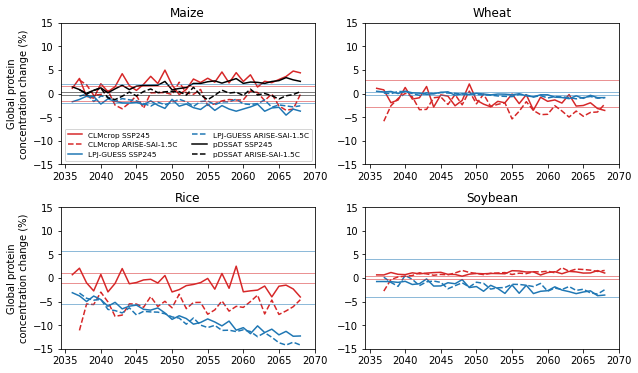

In [84]:
savedir = '/glade/campaign/univ/urtg0006/Brendan/GGCMI_model_comp_figs/protein'
fig = plt.figure()
fig.set_size_inches(10,6)
ax1 = fig.add_subplot(221)
ax1.plot(time,maizessp_pchange_clm,linewidth=1.5,color='tab:red',label="CLMcrop SSP245")
ax1.plot(time_clm,maizesai_pchange_clm,linewidth=1.5,color='tab:red',linestyle='dashed',label="CLMcrop ARISE-SAI-1.5C")
ax1.plot(time,maizessp_pchange_lpj,linewidth=1.5,color='tab:blue',label="LPJ-GUESS SSP245")
ax1.plot(time_clm,maizesai_pchange_lpj,linewidth=1.5,color='tab:blue',linestyle='dashed',label="LPJ-GUESS ARISE-SAI-1.5C")
ax1.plot(time,maizessp_pchange_dsat,linewidth=1.5,color='black',label="pDSSAT SSP245")
ax1.plot(time_clm,maizesai_pchange_dsat,linewidth=1.5,color='black',linestyle='dashed',label="pDSSAT ARISE-SAI-1.5C")
ax1.legend(loc="lower left", ncol=2, prop={'size': 7.4})
ax1.set_title('Maize',size=12)
ax1.set_ylim([-15, 15])
#ax1.set_xticks(xticks)
ax1.set_yticks(np.arange(-15, 16, 5))
ax1.set_xticks(np.arange(2035, 2075, 5))
ax1.axhline(y=-1.5, color='tab:red',linewidth=0.5)
ax1.axhline(y=1.5, color='tab:red',linewidth=0.5)
ax1.axhline(y=-2, color='tab:blue',linewidth=0.5)
ax1.axhline(y=2, color='tab:blue',linewidth=0.5)
ax1.axhline(y=-0.3, color='black',linewidth=0.5)
ax1.axhline(y=0.3, color='black',linewidth=0.5)
#ax1.axhline(y=-7.8, color='k', linestyle='--',linewidth=1.5)
#ax1.axhline(y=7.8, color='k', linestyle='--',linewidth=1.5)
#ax1.axhline(y=0, color='k', linestyle='-',linewidth=1)
ax1.set_ylabel("Global protein\nconcentration change (%)",fontsize=10)
#ax1.set_ylabel("Global Productivity (Mt/yr)",fontsize=12)

ax2 = fig.add_subplot(222)
ax2.plot(time,wheatssp_pchange_clm,linewidth=1.5,color='tab:red',label="CLMcrop SSP245")
ax2.plot(time_clm,wheatsai_pchange_clm,linewidth=1.5,color='tab:red',linestyle='dashed',label="CLMcrop SSP245-SAI")
ax2.plot(time,wheatssp_pchange_lpj,linewidth=1.5,color='tab:blue',label="LPJ-GUESS SSP245")
ax2.plot(time_clm,wheatsai_pchange_lpj,linewidth=1.5,color='tab:blue',linestyle='dashed',label="LPJ-GUESS SSP245-SAI")
ax2.set_title('Wheat',size=12)
ax2.set_ylim([-15, 15])
#ax1.set_xticks(xticks)
ax2.set_yticks(np.arange(-15, 16, 5))
ax2.set_xticks(np.arange(2035, 2075, 5))
ax2.axhline(y=-2.8, color='tab:red',linewidth=0.5)
ax2.axhline(y=2.8, color='tab:red',linewidth=0.5)
ax2.axhline(y=-0.4, color='tab:blue',linewidth=0.5)
ax2.axhline(y=0.4, color='tab:blue',linewidth=0.5)
#ax1.axhline(y=-7.8, color='k', linestyle='--',linewidth=1.5)
#ax1.axhline(y=7.8, color='k', linestyle='--',linewidth=1.5)
#ax2.axhline(y=0, color='k', linestyle='-',linewidth=1)
#ax2.set_ylabel("Global protein change (%)",fontsize=12)
#ax1.set_ylabel("Global Productivity (Mt/yr)",fontsize=12)

ax3 = fig.add_subplot(223)
ax3.plot(time,ricessp_pchange_clm,linewidth=1.5,color='tab:red',label="CLMcrop SSP245")
ax3.plot(time_clm,ricesai_pchange_clm,linewidth=1.5,color='tab:red',linestyle='dashed',label="CLMcrop SSP245-SAI")
ax3.plot(time,ricessp_pchange_lpj,linewidth=1.5,color='tab:blue',label="LPJ-GUESS SSP245")
ax3.plot(time_clm,ricesai_pchange_lpj,linewidth=1.5,color='tab:blue',linestyle='dashed',label="LPJ-GUESS SSP245-SAI")
#ax2.legend(loc="upper left", ncol=1, prop={'size': 12})
ax3.set_title('Rice',size=12)
ax3.set_ylim([-15, 15])
#ax1.set_xticks(xticks)
ax3.set_yticks(np.arange(-15, 16, 5))
ax3.set_xticks(np.arange(2035, 2075, 5))
ax3.axhline(y=-1, color='tab:red',linewidth=0.5)
ax3.axhline(y=1, color='tab:red',linewidth=0.5)
ax3.axhline(y=-5.6, color='tab:blue',linewidth=0.5)
ax3.axhline(y=5.6, color='tab:blue',linewidth=0.5)
#ax2.axhline(y=-7.8, color='k', linestyle='--',linewidth=1.5)
#ax2.axhline(y=7.8, color='k', linestyle='--',linewidth=1.5)
#ax3.axhline(y=0, color='k', linestyle='-',linewidth=1)
ax3.set_ylabel("Global protein\nconcentration change (%)",fontsize=10)
#ax1.set_ylabel("Global Productivity (Mt/yr)",fontsize=12)

ax4 = fig.add_subplot(224)
ax4.plot(time,soyssp_pchange_clm,linewidth=1.5,color='tab:red',label="CLMcrop SSP245")
ax4.plot(time_clm,soysai_pchange_clm,linewidth=1.5,color='tab:red',linestyle='dashed',label="CLMcrop SSP245-SAI")
ax4.plot(time,soyssp_pchange_lpj,linewidth=1.5,color='tab:blue',label="LPJ-GUESS SSP245")
ax4.plot(time_clm,soysai_pchange_lpj,linewidth=1.5,color='tab:blue',linestyle='dashed',label="LPJ-GUESS SSP245-SAI")
#ax2.legend(loc="upper left", ncol=1, prop={'size': 12})
ax4.set_title('Soybean',size=12)
ax4.set_ylim([-15, 15])
#ax1.set_xticks(xticks)
ax4.set_yticks(np.arange(-15, 16, 5))
ax4.set_xticks(np.arange(2035, 2075, 5))
ax4.axhline(y=-0.3, color='tab:red',linewidth=0.5)
ax4.axhline(y=0.3, color='tab:red',linewidth=0.5)
ax4.axhline(y=-4, color='tab:blue',linewidth=0.5)
ax4.axhline(y=4, color='tab:blue',linewidth=0.5)
#ax2.axhline(y=-7.8, color='k', linestyle='--',linewidth=1.5)
#ax2.axhline(y=7.8, color='k', linestyle='--',linewidth=1.5)
#ax4.axhline(y=0, color='k', linestyle='-',linewidth=1)
#ax1.set_ylabel("Global protein change (%)",fontsize=14)
#ax1.set_ylabel("Global Productivity (Mt/yr)",fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.savefig(savedir+'/Nature_fig1.pdf', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )